In [1]:
import pyvo 
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

In [2]:
import numpy as np

Para el punto 6 debo estudiar la distribucion para distintas tecnicas de observacion (transito, RV, microlentes, etc) y ver si existe una correllacion entre la tecnica utilizada y los datos observados.

In [4]:
query = "SELECT detection_type, mass, period FROM exoplanet.epn_core WHERE (mass IS NOT NULL AND period IS NOT NULL)" 
# Busco los resultados que tengan masa y periodo NO nulo

In [5]:
resultados = service.search(query)

In [6]:
len(resultados)
# Numero de resultados
print(resultados)
# Me muestra una tabla donde me mete los valores detectados de masa, periodo orbital y el metodo de deteccion

<Table length=1050>
 detection_type      mass      period 
                'jupiterMass'    d    
     object        float64    float64 
--------------- ------------- --------
        Imaging          21.0 730000.0
         Pulsar           1.9    416.0
        Imaging          20.0   7340.0
        Imaging          30.0   8686.0
     Astrometry         66.95    690.0
        Imaging           3.7  32850.0
        Imaging           2.6  10260.0
Radial Velocity          0.47   4.2308
Radial Velocity          0.84 14.65314
            ...           ...      ...
Radial Velocity          3.25  16509.0
Radial Velocity         63.88    428.5
Radial Velocity         11.09    903.3
        Imaging          13.0 215000.0
Radial Velocity         13.01  2089.11
Primary Transit       0.01517  6.26784
Radial Velocity          5.84  3.31249
Radial Velocity          0.62  4.61711
Radial Velocity           9.1  240.937
Radial Velocity         23.58 1281.439


In [6]:
len(resultados[0])
# Numero de columnas

3

In [7]:
np.save('myresults',resultados.to_table())
# Pido que me guarde los datos en una tabla numpy

In [8]:
resultados = np.load('myresults.npy', allow_pickle=True)
# accedemos a la tabla que guardamos

In [9]:
print(resultados[7] [0], resultados[7] [1], resultados[7] [2])

b'Radial Velocity' 0.47 4.2308


In [10]:
print(resultados[0] [0], resultados[0] [1], resultados[0] [2])
# Vemos que el primer numero (0) nos indica la fila y el segundo la columna una vez pasado a un array

b'Imaging' 21.0 730000.0


In [11]:
len(resultados)

1050

Quiero filtrar estos datos, separando los metodos usados en cada deteccion (los datos filtrados le aplico log10):

In [12]:
# Creo una lista de Masas y Periodos para cada metodo de deteccion
Masa1 = []
Periodo1 = []
Imaging = [Masa1, Periodo1]
# Imagenes
Masa2 = []
Periodo2 = []
RV = [Masa2, Periodo2]
# Radial Velocity
Masa3 = []
Periodo3 = []
Transito_P = [Masa3, Periodo3]
# transito primario
Masa4 = []
Periodo4 = []
Astrometry = [Masa4, Periodo4]

Masa5 = []
Periodo5 = []
Pulsar = [Masa5, Periodo5]
# Timing

Masa6 = []
Periodo6 = []
Microlentes = [Masa6, Periodo6]

Masa7 = []
Periodo7 = []
Transito_S= [Masa7, Periodo7]
# transito secundario

Masa8 = []
Periodo8 = []
Default = [Masa8, Periodo8]

Masa9 = []
Periodo9 = []
TTV = [Masa9, Periodo9]
# Variacion de tiempo de trnasito en sistemas planetarios multiples (por ej. 3 planetas)

for i in range(len(resultados)):
    if resultados[i][0] == b'Imaging':
        Masa1.append(np.log10(resultados[i][1]))
        Periodo1.append(np.log10(resultados[i][2]))
    elif  resultados[i][0] == b'Radial Velocity':
        Masa2.append(np.log10(resultados[i][1]))
        Periodo2.append(np.log10(resultados[i][2]))
    elif  resultados[i][0] == b'Primary Transit':
        Masa3.append(np.log10(resultados[i][1]))
        Periodo3.append(np.log10(resultados[i][2]))
    elif  resultados[i][0] == b'Astrometry':
        Masa4.append(np.log10(resultados[i][1]))
        Periodo4.append(np.log10(resultados[i][2]))
    elif  resultados[i][0] == b'Pulsar':
        Masa5.append(np.log10(resultados[i][1]))
        Periodo5.append(np.log10(resultados[i][2]))
    elif  resultados[i][0] == b'Microlensing':
        Masa6.append(np.log10(resultados[i][1]))
        Periodo6.append(np.log10(resultados[i][2]))
    elif  resultados[i][0] == b'Secundary Transit':
        Masa7.append(np.log10(resultados[i][1]))
        Periodo7.append(np.log10(resultados[i][2]))
    elif  resultados[i][0] == b'Default':
        Masa8.append(np.log10(resultados[i][1]))
        Periodo8.append(np.log10(resultados[i][2]))
    elif  resultados[i][0] == b'TTV':
        Masa9.append(np.log10(resultados[i][1]))
        Periodo9.append(np.log10(resultados[i][2]))

In [3]:
import matplotlib.pyplot as plt

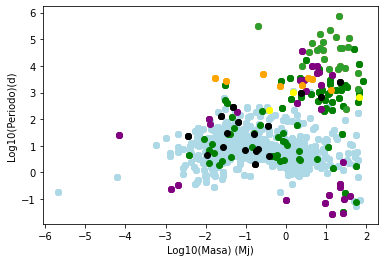

In [16]:
plt.xlabel('Log10(Masa) (Mj)')
plt.ylabel('Log10(Periodo)(d)')

for i in range(3):
    plt.scatter(Masa3, Periodo3, color = 'lightblue')   #Transito Primario
    plt.scatter(Masa2, Periodo2, color = 'green')       #Velocidad Radial
    plt.scatter(Masa1, Periodo1)                        #Imagenes 
    plt.scatter(Masa4, Periodo4, color = 'yellow')      #Astrometria 
    plt.scatter(Masa5, Periodo5, color = 'purple')      #Timing O Pulsar
    plt.scatter(Masa6, Periodo6, color = 'orange')      #Microlentes
    plt.scatter(Masa7, Periodo7, color = 'brown')       #Transito Secundario
    plt.scatter(Masa8, Periodo8, color = 'cyan')        #Default
    plt.scatter(Masa9, Periodo9, color = 'black')       #TTV
#     hice el plot del transito primario como primero para que se superponga con los otros, ya que son mucho mas y no queria que
# los tape a los otros scatters

Podemos ver que la tecnica de transito primario es la que mayor cantidad de planetas ha descubierto, podriamos "encerrar" los planetas obtenidos en en dos intervalos: [-3;2] para la masa ( o sea de menos 1000 veces hasta 100 veces la masa de Jupyter) y periodo [0;2,5] aproximadamente. Esta Tecnica de ve favorecida si el planeta tiene un radio grande relativo a su estrella y se encuentra cerca de esta. 
La tecnica de velocidad radial utiliza el efecto doppler, cuanto mas masivo el planeta, mas movido el CM sera de la estrella y mayor va a ser este efecto. 

Para el punto 7, la distancia de los exoplanetas a la estrella importo los valores de los semiejes mayores (a). 

In [17]:
query = "SELECT semi_major_axis FROM exoplanet.epn_core WHERE semi_major_axis IS NOT NULL" 

In [18]:
resultados3 = service.search(query)

In [19]:
len(resultados3)
print(resultados3)
# Vemos el resultados de la busqueda tipo tabla

<Table length=2809>
semi_major_axis
       AU      
    float64    
---------------
           1.29
          243.0
           1.54
           0.83
           2.77
           1.68
           1.45
            2.6
          330.0
            ...
          0.538
          1.334
          0.133
          0.243
           1.17
          0.059
          0.861
           2.55
         5.2456
          907.0


In [20]:
np.save('MiBusqueda',resultados3.to_table())

In [51]:
resultados3 = np.load('MiBusqueda.npy', allow_pickle=True)

In [52]:
resultados3

array([(  1.29  ,), (243.    ,), (  1.54  ,), ..., (  2.55  ,),
       (  5.2456,), (907.    ,)], dtype=[('semi_major_axis', '<f8')])

Vemos que no obtengo un array para poder hacer un histograma (me va a dar error), quiero los valores que estan dentro del parentesis

In [53]:
resultados3 [0][0]

1.29

In [54]:
lista3 = []
for i in range(len(resultados3)):
    lista3.append(np.log10(resultados3[i][0]))
#     los paso a log para el plot

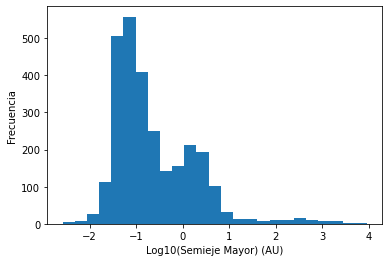

In [55]:
plt.xlabel('Log10(Semieje Mayor) (AU)')
plt.ylabel('Frecuencia')
a = plt.hist(lista3, bins =25)

Los numeros en el eje x indica el exponente del 10, porque recordemos que los valores son pasados al log10, entonces si:
b = log10(a) ==> a = 10^b, estamos ploteando en el eje x los exponentes de 10.
Los valores del semieje mayor (a), es una V.A.continua, ya que pueden tener cualquier valor y no son acotados superiormente, por lo tanto si debemos comparar dos distribuciones de V.A. continuas y ver si son las mismas, debemos usar el KS Test (de Kolmogorov-Smirnov). 
KS Test: Es una prueba de hipotesis, con $Ho$ donde suponemos que las dos distribuciones son iguales, el estadistico de prueba $Do$ es la maxima separacion entre las 2 acumuladas, (una la teorica y la otra es la observada), este estadistico no depende de la distribucionque yo asuma y tiene una distribucion conocida, dado un intervalo de confianza, si mi estadistico cae en la la cola de la distribucion, se considera que $Do$ es raro y entonces no tengo pruebas suficientes para aceptar la hipotesis nula y se rechaza que sean de la misma distribucion, si en cambio cae en la zona mas probable, no tengo evidencia suficiente para rechazar $Ho$.



Una caractereıstica del metodo KS es que es invariante bajo reparametrizaciones de la variable x, es decir, se puede comprimir o alargar el eje x, y la distancia maxima permanecera invariante (por lo tanto no importa la escala del eje x, sirve igualmente).

In [4]:
import scipy
from scipy import stats as st

Entonces debo obtener una gaussiana teorica con la desviacion estandard y la media empirica, luego importar el paquete del KS Test que me calcule el estadistico de prueba. El estadistico obtenido lo comparo con la tabla que me dara el valor critico segun los grados de libertad y el nivel de confianza. 

In [57]:
mu = (np.mean(lista3))
s = np.std(lista3)
print(mu)
# media
print(s)
# desviacion estandard 

-0.6237700751328809
0.8830084539454216


Para esto he pensado dos formas de hacerlo, la primera es creando valores random de una distribucion de gaussiana y usar el ks test, la otra es plotear la funcion teorica de la gaussiana. 

(array([  4.,   5.,  13.,  25.,  58.,  63.,  98., 152., 197., 238., 306.,
        293., 291., 252., 279., 175., 138.,  95.,  60.,  32.,  18.,  10.,
          4.,   2.,   1.]),
 array([-3.53064196, -3.28639272, -3.04214348, -2.79789424, -2.553645  ,
        -2.30939576, -2.06514652, -1.82089728, -1.57664804, -1.3323988 ,
        -1.08814956, -0.84390032, -0.59965108, -0.35540184, -0.1111526 ,
         0.13309664,  0.37734588,  0.62159512,  0.86584436,  1.1100936 ,
         1.35434284,  1.59859208,  1.84284132,  2.08709056,  2.3313398 ,
         2.57558904]),
 <a list of 25 Patch objects>)

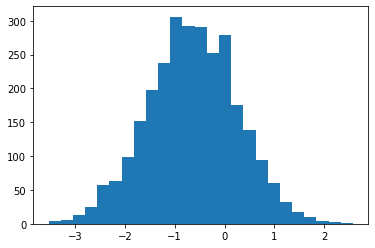

In [58]:
# Primera forma:
x1 =scipy.random.normal(loc = mu, scale = s, size = len(lista3))
# genera un random de distribucion normal estandar
# scale es la desviacion estandard
# loc es la media
# size es es el numero de la muestra
plt.hist(x1, bins = 25)

In [59]:
st.kstest(lista3, x1)
# al final analizo los resultados

KstestResult(statistic=0.12709149163403347, pvalue=3.519747234698515e-20)

In [60]:
st.ks_2samp(lista3, x1)
# Compara 2 muestras para ver si son de la misma distribucion

KstestResult(statistic=0.12709149163403347, pvalue=3.519747234698515e-20)

Segunda forma:

a[1] es la lista del intervalo de los bins, uso estos cuando quiero dar el intervalo para la gaussiana teorica

In [62]:
val_norm = []
# los valores de la gaussiana teorica
for i in range(len(a[1])):
    y = st.norm.pdf(a[1][i], mu, s)
#     dentro de cada intervalo me genera valores continuos de una gaussiana con esos mu, s dados
    val_norm.append(y)

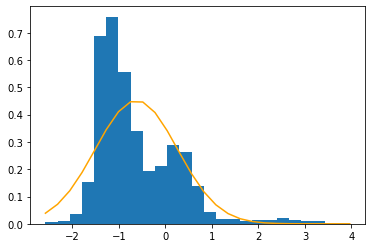

In [63]:
plt.plot(a[1], val_norm, color = 'orange')
# defino la gaussiana con media y sigma igual que la empirica, dentro del intervalo de esta misma usando su bins obtenidos.
A = plt.hist(lista3, bins =25, density = True)
# Hago el plot con la frecuencia relativa.

In [64]:
val_array = np.array(val_norm)
# Los valores obtenidos son valores de frecuencia relativa, lo paso a un array y lo multiplico por len(lista3) para obtener la
# frecuencia absoluta

In [65]:
st.kstest(lista3, val_array*len(lista3))

KstestResult(statistic=0.7760084344278008, pvalue=2.220446049250313e-15)

In [66]:
st.ks_2samp(lista3, val_array*len(lista3))

KstestResult(statistic=0.7760084344278008, pvalue=2.220446049250313e-15)

El valor $p$ es un valor de probabilidad, por lo que oscila entre 0 y 1. El valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido suponiendo que la hipótesis nula $Ho$ es cierta. Se suele decir que valores altos de $p$ no permiten rechazar la $Ho$, mientras que valores bajos de $p$ sí permiten rechazar la $Ho$.

En una prueba estadística, se rechaza la hipótesis nula $Ho$ si el valor p asociado al resultado observado es igual o menor que un nivel de significación $\alpha$  establecido arbitrariamente, convencionalmente 0,05 ó 0,01. En otras palabras, si el resultado obtenido es más inusual que el rango esperado de resultados dada una hipótesis nula $Ho$ cierta y el nivel de significación $\alpha$  elegido, es decir si $p$ es menor que $\alpha$ , podemos decir que tenemos un resultado estadísticamente significativo que permite rechazar $Ho$.

Como el valor de $p$ obtenido de ambas formas es mucho menor que  $\alpha$ = 0.05, se rechaza la $Ho$ a favor de la alternativa y la distribucion de las distancias de los exoplanetas a la estrella no sigue una gaussiana.

$Problema 8$

In [10]:
query = "SELECT mass, radius FROM exoplanet.epn_core WHERE mass IS NOT NULL AND radius IS NOT NULL" 

In [11]:
resultados4 = service.search(query)

In [12]:
len(resultados4)
print(resultados4)
# Vemos el resultados de la busqueda tipo tabla

<Table length=943>
     mass        radius   
'jupiterMass' 'jupiterRad'
   float64      float64   
------------- ------------
         14.0          1.7
         20.0          1.0
         13.9         1.44
         20.0         0.92
         30.0          1.3
          2.6         1.11
         0.47          1.9
      0.02703       0.1737
         54.2         1.02
          ...          ...
         0.62        0.973
        11.79        1.217
        1.616        1.317
        1.077         1.03
          1.9         2.07
        0.709        1.373
         11.7         1.65
          8.2          1.2
         13.0          1.2
      0.01517      0.16719


In [78]:
np.save('MasayRadio',resultados4.to_table())

In [5]:
resultados4 = np.load('MasayRadio.npy', allow_pickle=True)

In [6]:
resultados4 [0]

(14., 1.7)

In [7]:
Masa = []
Radio = []
for i in range (len(resultados4)):
    Masa.append(np.log10(resultados4[i][0]))
    Radio.append(np.log10(resultados4[i][1]))

Text(0, 0.5, 'Log10(Radio) (Rj)')

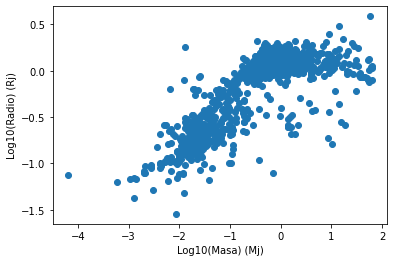

In [8]:
plt.scatter(Masa, Radio)
plt.xlabel('Log10(Masa) (Mj)')
plt.ylabel('Log10(Radio) (Rj)')

Para el ajuste del modelo, usamos el Metodo de Expectacion de Maximizacion, para eso importo sk learn, es un paquete de python donde yo le doy el numero de ajuste de gaussianas mixtas, y me encuentra sus valores de media, covarianza y peso caracteristico con varias iteraciones, para un mejor ajuste s ele puede dar un parametro inicial de estos valores

In [9]:
from sklearn import mixture

In [30]:
# gaussian mixture?

In [31]:
gmm = mixture.GaussianMixture(n_components = 2)
# llamo gmm a la gaussian mixture con ajuste de 2 gaussianas

In [32]:
A = np.zeros([len(Masa), 2])
# Genero una matriz nula, con filas igual a la cantidad de elementos de la masa y 2 columnas

In [33]:
A[:,0] = Masa
# Inserto en la primera columna los valores de la masa de los planetas
A[:,1] = Radio 
# Inserto en la segunda columna los valores de los radios de los planetas

In [34]:
# A

In [35]:
gmm.fit(A)
# Nos devuelve A pero con nuevas propiedades

GaussianMixture(n_components=2)

In [36]:
# gmm.predict(A)
# Nos separa en etiquetas (labels) los datos de A, porque en este caso lo quisimos ajustar con 2 gaussianas

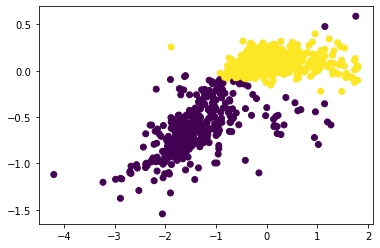

In [37]:
plt.scatter(Masa, Radio, c = np.array(gmm.predict(A)))
# Nos asigna un color a los puntos, uno por cada gaussiana en las que los divide

In [49]:
means = gmm.means_
means
# Nos devuelve las corrdenadas de las medias

array([[-1.38576725, -0.63139662],
       [ 0.13707855,  0.0892171 ]])

In [52]:
stds = gmm.covariances_
stds
# Nos devuelve las covarianzas

array([[[0.56218659, 0.13139782],
        [0.13139782, 0.08221034]],

       [[0.30084131, 0.00067656],
        [0.00067656, 0.00898887]]])

In [51]:
peso = gmm.weights_
peso
# Nos da el peso de cada distribucion de puntos en la cual los hemos divididos

array([0.42367957, 0.57632043])

Se aconseja para el futuro intentarlo a hacerlo a mano, o sea, encontrar los parametros: la media, la covarianza y el peso caracteristico, e intentar a hacer el ajuste a mano o insertar los prametros encontrados en el sk-learn para mejor optimizacion 

Pero como se cuantas gaussianas son las adecuadas para el ajuste? Para eso podemos usar dos modelos de criterio:
Criterio de caracterizacion bayesiano (BIC)
Criterio de crcterizacion de Aikaki (AIC).

El menor numero al que llegan en las iteraciones, supongamos en n = 3, entonces 3 gaussianas son las adecuadas para el ajuste.

In [17]:
B = gmm.aic(A)
C = gmm.bic(A)

1900.8708838943674 1954.1638541656582
1642.8625308758933 1725.2243940224337
1623.1991687193738 1734.629924741164
1583.6619153667457 1724.1615642637853
1547.8582524174603 1717.4267941897494
1516.9833681754776 1715.6208028230164
1521.3286129348062 1749.0349404575945
1520.7170917843735 1777.4923121824113


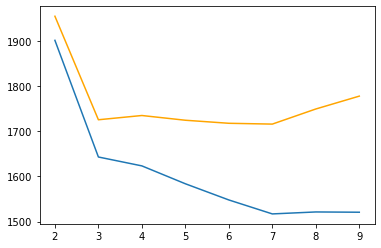

In [30]:
Aics = []
Bics = []
for i in range(2,10):
    gmms = mixture.GaussianMixture(n_components=i)
    gmms.fit(A)
    B = gmms.aic(A)
    C=gmms.bic(A)
    Aics.append(B)
    Bics.append(C)

plt.plot(np.arange(2,10,1), Aics)
plt.plot(np.arange(2,10,1), Bics, color = 'orange')
for i, j in zip(Aics, Bics):
    print (i,j)

Vemos que para ambos metodos, con 7 gaussianas se realiza el mejor ajuste